In [17]:
%plot inline

In [18]:
clear variables; close all; clc;

## Set-up

In [19]:
% Discretization parameters
nx = 81;
ny = 81;
dt = 0.025;
dx = 1/(nx-1);
dy = 1/(ny-1);

% Time interval
t_0 = 0;
tf = 0.25;

% Problem parameters
D = 0.05;
kindergarten = [0.5, 0.5];
W = 1;
theta = pi/2;
a1 = 2;
a2 = 1;
s1 = 100;
s2 = 150;

% Set up arrays for later
x = 0:dx:1;
y = 0:dy:1;
t = 0:dt:tf;
nt = length(t);

## Create u

In [23]:
% the first dimension of u is the flattened spatial dimension,
% and the second dimension is time
u = zeros(ny*nx, nt);

boundaries = [1:ny 1:ny:ny*nx ny:ny:ny*nx nx*(ny-1)+1:nx*ny];
% (above) might be less confusing to use the G function for this...

%% Initial condition
u0 = a1*exp(-s1*bsxfun(@plus, (x-0.25).^2, (y'-0.25).^2)) + ...
     a2*exp(-s2*bsxfun(@plus, (x-0.65).^2, (y'-0.4).^2));
u(:,1) = u0(:); % flatten
u(boundaries,1) = 0; % set initial condition at boundaries to 0

## Initial plot

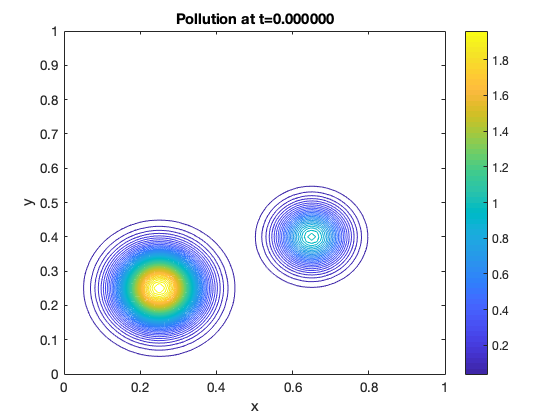

In [21]:
uplot = reshape(u, [ny, nx, nt]);

num_contours = 50;

figure;
contour(x, y, uplot(:,:,1), num_contours);
colorbar;
title(sprintf('Pollution at t=%f', 0));
xlabel('x');
ylabel('y');

## Creating the 'A' Matrix

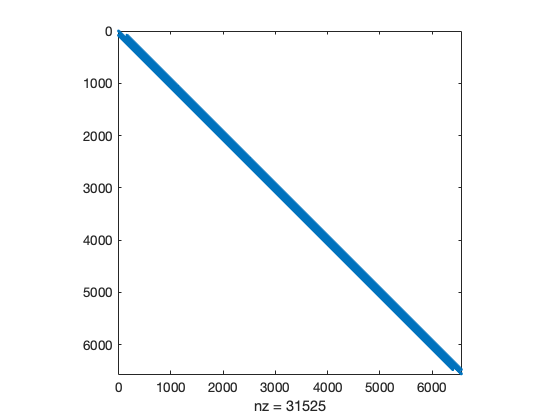

In [30]:
A = createA(D, W, theta, nx, ny, dx, dy, dt);
spy(A) % generate sparsity visualization

The plot above makes it very hard to see the actual pattern, so we can zoom in to a region near the middle:

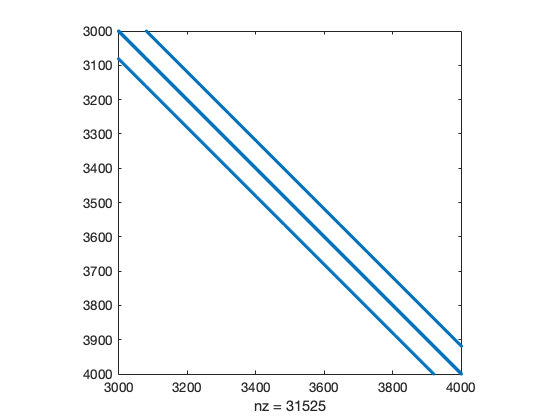

In [34]:
spy(A)
xlim([3000 4000])
ylim([3000 4000])

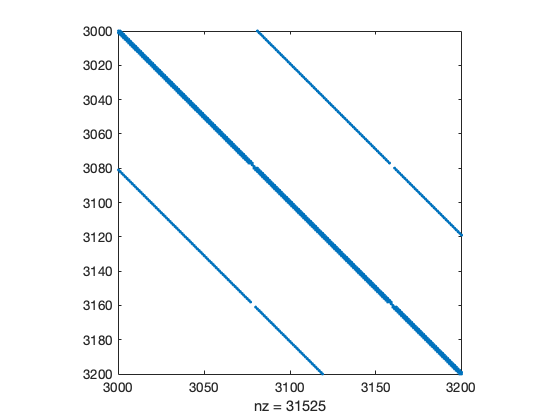

In [37]:
spy(A)
xlim([3000 3200])
ylim([3000 3200])

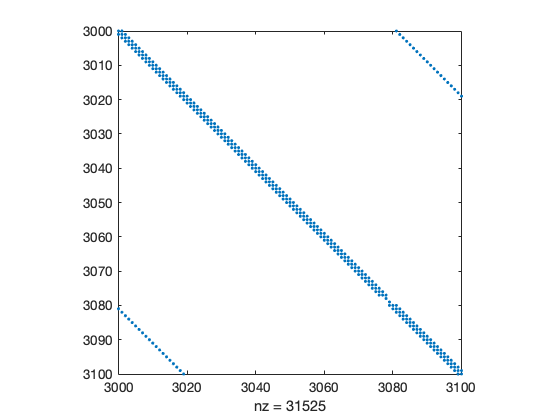

In [38]:
spy(A)
xlim([3000 3100])
ylim([3000 3100])